In [1]:
import pandas as pd
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Import csv
gameData = pd.read_csv(r'./DA_Tutorial_24.csv')

# xG Data
xGData = pd.read_csv(r'./DA_Tutorial_24_xg.csv')

# Import image
# Load image
rinkImage = Image.open(r'./rink_template.png')

print(f'Game data contains {gameData.shape[0]} rows & xG data contains {xGData.shape[0]} rows.')
gameData.head()

Game data contains 1797 rows & xG data contains 132 rows.


,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid,opposingteamgoalieoniceid,xadjcoord,yadjcoord
0,pass,successful,south,0.733333,southCenterNZ,nz,evenStrength,0,311,111452,80264,-2.316772,9.808823
1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0,311,80,80264,-26.457947,6.791176
2,pass,successful,stretchoffboards,2.566667,westPointDZ,dz,evenStrength,0,311,80,80264,-30.481476,30.932352
3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0,311,111452,80264,3.718521,35.458824
4,pass,successful,outlet,5.433333,innerSlotDZ,dz,evenStrength,0,315,80264,5152,-81.171463,3.770588


In [3]:
xGData.head()

,compiledgametime,playerid,xg
0,82.2,56711,0.252678
1,90.9,108339,0.392448
2,154.1,80,0.322435
3,234.5,78625,0.261145
4,236.3,79380,0.252039


EDA

In [4]:
# Sort by gametime
gameData.sort_values('compiledgametime', ascending=True, inplace=True)

In [5]:
# Create successfullpasses [passoutcome]

def passoutcome(row):
    # When an eventName is pass and the outcome is successfull we assign 'completedpass'
    if row['eventname'] == 'pass' and row['outcome'] == 'successful':
        return 'successful'
    # When an eventName is pass and the outcome is failed we assign 'incompletepass'
    elif row['eventname'] == 'pass' and row['outcome'] == 'failed':
        return 'unsuccessful'
    # Else we return a null field
    else:
        return None
    
# Apply the function and create a new column
gameData['passoutcome'] = gameData.apply(passoutcome, axis=1)

# Randomly preview data
gameData[gameData['eventname'] == 'pass'].loc[:,['eventname','outcome','passoutcome']].sample(5)

,eventname,outcome,passoutcome
830,pass,successful,successful
609,pass,successful,successful
867,pass,successful,successful
1416,pass,failed,unsuccessful
1243,pass,failed,unsuccessful


In [6]:
# Create shot outcome

def shotoutcome(row):
    # When an eventName is shot and the outcome is successfull we assign 'shotonnet'
    if row['eventname'] == 'shot' and row['outcome'] == 'successful':
        return 'successful'
    # When an eventName is shot and the outcome is failed we assign 'shotoffnet'
    elif row['eventname'] == 'shot' and row['outcome'] == 'failed':
        return 'unsuccessful'
    # Else we return a null field
    else:
        return None
    
# Apply the function and create a new column
gameData['shotoutcome'] = gameData.apply(shotoutcome, axis=1)

# Randomly preview data
gameData[gameData['eventname'] == 'shot'].loc[:,['eventname','outcome','shotoutcome']].sample(5)

,eventname,outcome,shotoutcome
1714,shot,successful,successful
1156,shot,successful,successful
1390,shot,successful,successful
49,shot,successful,successful
873,shot,successful,successful


In [7]:
# Create receiption outcome

def receiptionoutcome(row):
    # When an eventName is shot and the outcome is successfull we assign 'shotonnet'
    if row['eventname'] == 'reception' and row['outcome'] == 'successful':
        return 'successful'
    # When an eventName is shot and the outcome is failed we assign 'shotoffnet'
    elif row['eventname'] == 'reception' and row['outcome'] == 'failed':
        return 'unsuccessful'
    # Else we return a null field
    else:
        return None
    
# Apply the function and create a new column
gameData['receptionoutcome'] = gameData.apply(receiptionoutcome, axis=1)

# Randomly preview data
gameData[gameData['eventname'] == 'reception'].loc[:,['eventname','outcome','receptionoutcome']].head(10)

,eventname,outcome,receptionoutcome
1,reception,successful,successful
3,reception,successful,successful
5,reception,successful,successful
7,reception,successful,successful
9,reception,successful,successful
11,reception,successful,successful
13,reception,successful,successful
15,reception,successful,successful
19,reception,successful,successful
23,reception,successful,successful


In [8]:
# Create period column

def assign_period(row):
    if 0 < row['compiledgametime'] <= 1200:
        return 'firstPeriod' # 1st period for first 20 mins
    elif 1200 < row['compiledgametime'] <= 2400:
        return 'secondPeriod' # 2nd period for 20 mins - 40 mins
    elif 2400 < row['compiledgametime'] <= 3600:
        return 'thirdPeriod' # 3rd period time between 40 mins - 60 mins
    else:
        return 'overtime'  # Time after 60 mins is assigned overtime

# Apply the function to create a new 'period' column
gameData['gamePeriod'] = gameData.apply(assign_period, axis=1)

# Preview data
gameData[['compiledgametime','gamePeriod']].sample(5)

,compiledgametime,gamePeriod
324,681.00000,firstPeriod
62,151.66667,firstPeriod
935,1955.06670,secondPeriod
906,1881.06670,secondPeriod
168,357.93332,firstPeriod


In [9]:
# Find shot distance
gameData[['shotoutcome','xadjcoord','yadjcoord']].head()

goalCoordinates = [0,0]


def shotdistance(row):

    if row['shotoutcome'] != None:
        # Store x, y values
        x = row['xadjcoord']
        y = row['yadjcoord']

        # 
        position = [x,y]

        # Distance from the goal line
        distance = math.dist(goalCoordinates, position)
    else:
        return None

    return distance

gameData['shotdistance'] = gameData.apply(shotdistance, axis = 1)

gameData[['shotoutcome','xadjcoord','yadjcoord','shotdistance']].head()


,shotoutcome,xadjcoord,yadjcoord,shotdistance
0,None,-2.316772,9.808823,NaN
1,None,-26.457947,6.791176,NaN
2,None,-30.481476,30.932352,NaN
3,None,3.718521,35.458824,NaN
4,None,-81.171463,3.770588,NaN


Group Data by Team ID

In [10]:
gameData['teamid'].unique()

array([311, 315], dtype=int64)

Create shot assist column for each team

In [11]:
#gameData['shotassist'] = None

def assignshotassistcordinates(teamID):

    # Filter for a specified team
    teamData = gameData[gameData['teamid'] == teamID].reset_index(drop=True)

    # Assign shot assist
    teamData['shotassist'] = None

    # Iterate over the events
    for i in range(len(teamData) - 2):
        if (teamData.loc[i, 'passoutcome'] == 'successful' and
            teamData.loc[i + 1, 'receptionoutcome'] == 'successful' and
            #teamData.loc[i, 'teamid'] == teamData.loc[i + 1, 'teamid'] and teamData.loc[i, 'playerid'] != teamData.loc[i + 1, 'playerid'] and
            teamData.loc[i + 2, 'shotoutcome'] == 'successful'):
            #teamData.loc[i + 1, 'playerid'] == teamData.loc[i + 2, 'playerid']):
            
            # Mark the shot as having a Shot Assist
            teamData.at[i + 2, 'shotassist'] = 'shotassist'

    # Assing end coordinates
    teamData['end_xcoord'] = np.nan
    teamData['end_ycoord'] = np.nan

    # Iterate over the events to assign end coordinates
    for i in range(len(teamData) - 1):
        if (teamData.loc[i, 'passoutcome']  != None):# and
            #teamData.loc[i + 1, 'receptionoutcome'] == 'successful'):
            #gameData.loc[i, 'teamid'] == gameData.loc[i + 1, 'teamid'] and gameData.loc[i, 'playerid'] != gameData.loc[i + 1, 'playerid']):
            
            # Assign the receiver's coordinates to the passer's end coordinates
            teamData.at[i, 'end_xcoord'] = teamData.loc[i + 1, 'xadjcoord']
            teamData.at[i, 'end_ycoord'] = teamData.loc[i + 1, 'yadjcoord']

        elif (teamData.loc[i, 'shotoutcome'] == 'successful'):
            teamData.at[i, 'end_xcoord'] = 89
            teamData.at[i, 'end_ycoord'] = 0

    return teamData

teamA = assignshotassistcordinates(311)
teamB = assignshotassistcordinates(315)

In [12]:
# Merge the xG table
mergedDF = pd.merge(gameData, # full game data table
                    xGData,  # xGChart table
                    on = 'compiledgametime', # similar columns in both tables
                    how = 'inner')
mergedDF.shape

(132, 20)

## Questions

# 1

### a. Which teamid won the game, what was the score, which period was the winning goal scored in?

In [13]:
print(f'Winning goal was scored in {gameData[gameData['goal'] == 1].iloc[-1]['gamePeriod']}')
gameData.groupby(['teamid']).sum()['goal'].reset_index()

Winning goal was scored in overtime


,teamid,goal
0,311,3
1,315,4


### b. Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

Text(0.5, 1.0, 'Overtime Shot Map (Red = Goal)')

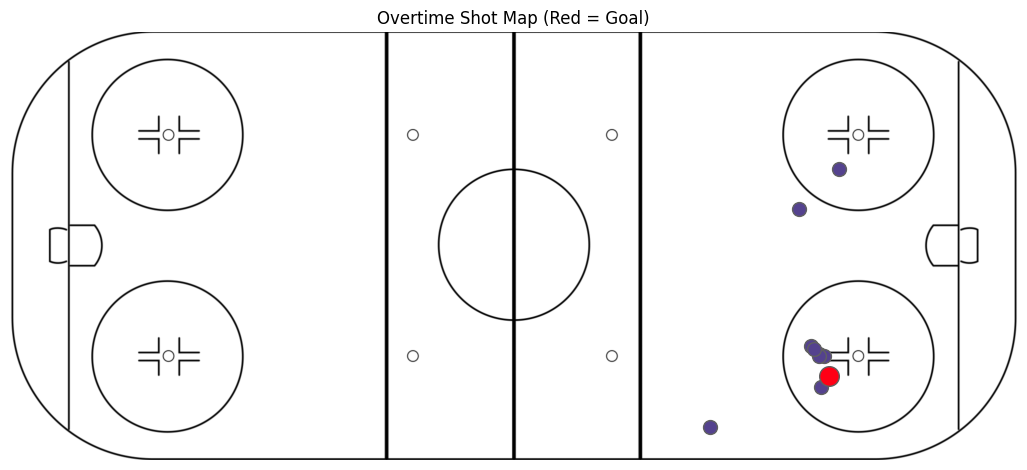

In [14]:
overtime = gameData[(gameData['gamePeriod'] == 'overtime') & 
                    (gameData['teamid'] == 315) & (gameData['eventname'] == 'shot')].reset_index(drop=True)

# Filter data
df_shots = overtime[overtime['goal'] == 0] # Non-goal shots
df_otgoal = overtime[overtime['goal'] == 1] # Goal shots

fig, ax = plt.subplots(figsize = (13,6))
ax.imshow(rinkImage, extent = [-100, 100, -42.5, 42.5])

# Plot non-goal shots
ax.scatter(df_shots['xadjcoord'], # X-coordinates
           df_shots['yadjcoord'], # Y-coordinates
           s = 100, # Adjust shape size
           edgecolors='#606060', # Add shape border
           color='#54428E') # Set color

# Plot Goal Shots
ax.scatter(df_otgoal['xadjcoord'], # X-coordinates
           df_otgoal['yadjcoord'], # Y-coordinates
           s = 200, # Adjust shape size
           edgecolors='#606060', # Add shape border
           color='#FF0015' # Set goal color to red
           )

# Hide axis
plt.axis('off')

# Add brief title
plt.title('Overtime Shot Map (Red = Goal)')

# 2

### a. Which playerid scored the winning goal? 

In [15]:
winningGoalScorer = gameData[gameData['goal'] == 1].iloc[-1]['playerid']
print(f'The playerid of the winning goal is: {winningGoalScorer}')

The playerid of the winning goal is: 81408


### b. Create a scatter plot for all of this player's powerplay shot attempts for the full game.

Text(0.5, 1.0, 'Player 81408 Shotmap ')

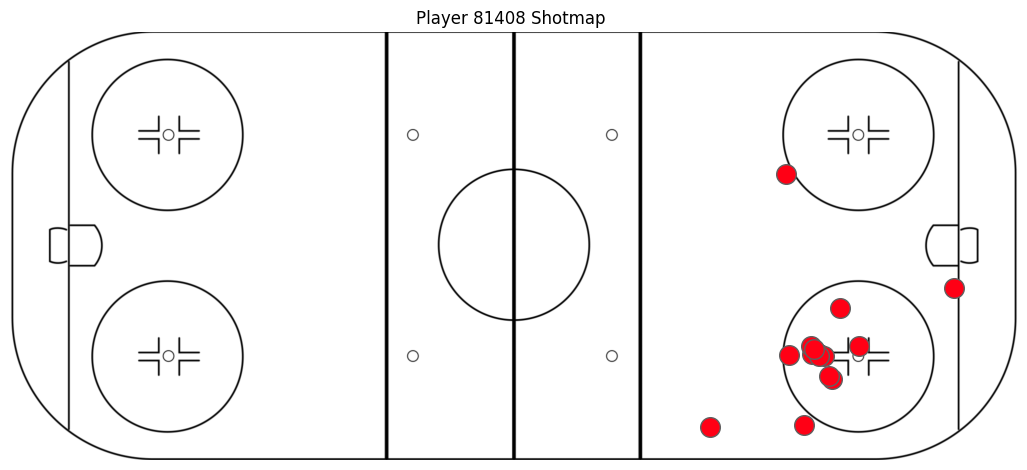

In [16]:
powerPlayer = gameData[(gameData['playerid'] == winningGoalScorer) & (gameData['eventname'] == 'shot')]

# Plot shot map for player
fig, ax = plt.subplots(figsize = (13,6)) 
ax.imshow(rinkImage, # Use 'desired image as background
          extent=[-100, 100, -42.5, 42.5] # Set desired axis to fit plot
          )

# Plot scatter plot
ax.scatter(data = powerPlayer, # our data source
           x = 'xadjcoord', # X-cordinate
           y = 'yadjcoord', # y-cordinate
           s = 200, # Adjust shape size
           edgecolors='#606060', # Add shape border
           color='#FF0015' # Set goal color to red
           )

# Hide axis
plt.axis('Off')
# Add brief title
plt.title(f'Player {winningGoalScorer} Shotmap ')

### c. If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

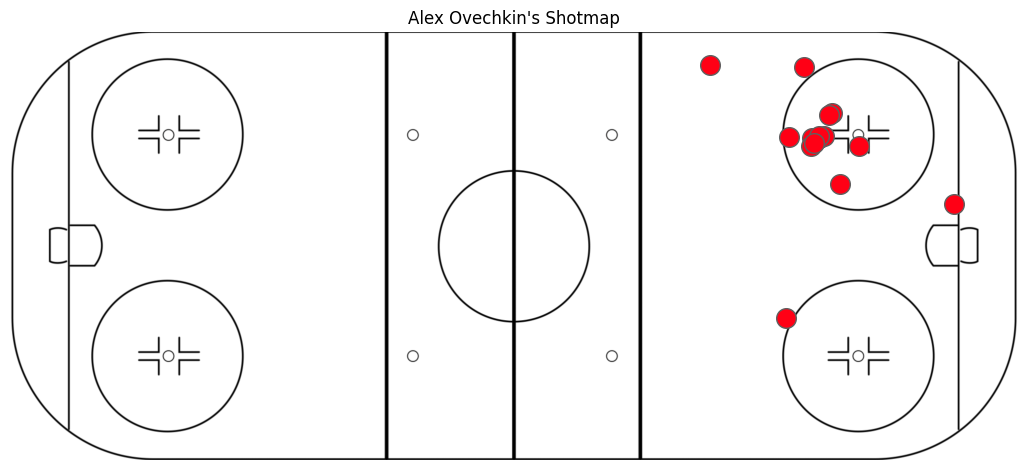

In [17]:
# Here we invert on the y-axis

# Plot shot map for player
fig, ax = plt.subplots(figsize = (13,6)) 
ax.imshow(rinkImage, # Use 'desired image as background
          extent=[-100, 100, -42.5, 42.5] # Set desired axis to fit plot
          )

# Plot scatter plot
ax.scatter(data = powerPlayer, # our data source
           x = 'xadjcoord', # X-cordinate
           y = 'yadjcoord', # y-cordinate
           s = 200, # Adjust shape size
           edgecolors='#606060', # Add shape border
           color='#FF0015' # Set goal color to red
           )

# Hide axis
plt.axis('Off')
# Add brief title
plt.title(f"Alex Ovechkin's Shotmap")

# Inverse the points
plt.gca().invert_yaxis()

# 3 

### a. The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 

In [18]:
winTeamID = 315
lossTeamID = 311
# Get pass completion rate
completeEvenPassData = gameData[(gameData['passoutcome'] == 'successful')
                            & (gameData['manpowersituation'] == 'evenStrength')].reset_index(drop=True)

# Function to get a team's pass and filter for needed columns
def teampass(team_id):

    df_team = completeEvenPassData[completeEvenPassData['teamid'] == team_id].reset_index(drop=True)
    df_team = df_team[['zone','xadjcoord','yadjcoord']]
    return df_team

# Pass the team_id and return the pass % in a dataframe
def passcompletion(team_id):

    df_filter = completeEvenPassData[completeEvenPassData['teamid'] == team_id].reset_index(drop=True)
    df_b = df_filter.groupby('zone')['eventname'].value_counts().reset_index(name='count')

    # Add the team_id
    df_b['teamid'] = team_id
    
    # Total passes
    totalPasses = df_b['count'].sum()

    # Percentage
    df_b['completionrate(%)'] = round((df_b['count']/totalPasses) * 100,1)

    return df_b

winTeamEvenPass = teampass(winTeamID)
lossTeamEvenPass = teampass(lossTeamID)

lossPassComp = passcompletion(lossTeamID)
winPassComp = passcompletion(winTeamID)

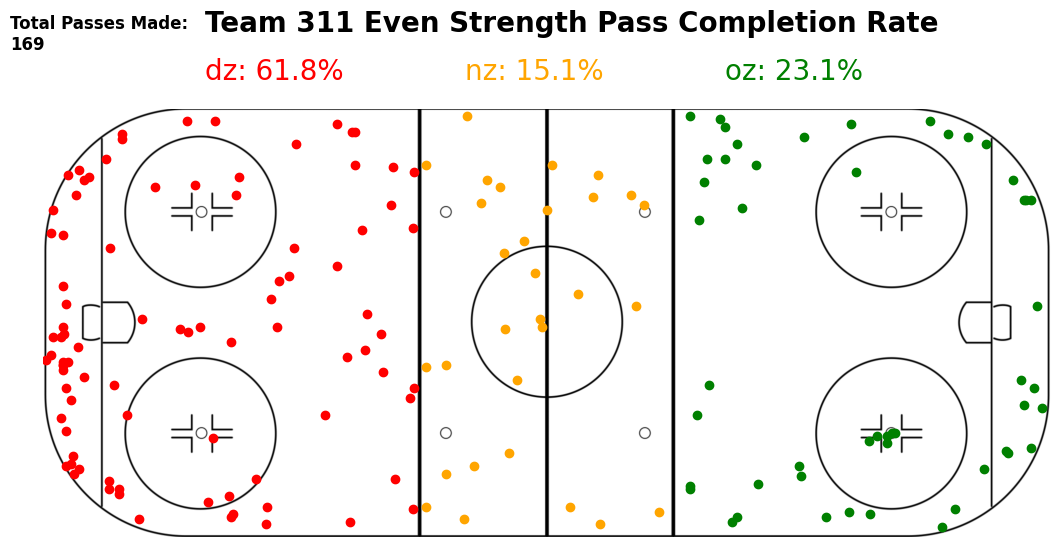

In [19]:
# Plot shot map for player
fig, ax = plt.subplots(figsize = (13,6)) 
ax.imshow(rinkImage, # Use 'desired image as background
          extent=[-100, 100, -42.5, 42.5] # Set desired axis to fit plot
          )

# Plot the scatter based on zones
for x in range(len(lossTeamEvenPass['xadjcoord'])):
    if lossTeamEvenPass['zone'][x] == 'dz':
        ax.scatter(lossTeamEvenPass['xadjcoord'][x], lossTeamEvenPass['yadjcoord'][x], color = 'red')
    if lossTeamEvenPass['zone'][x] == 'nz':
        ax.scatter(lossTeamEvenPass['xadjcoord'][x], lossTeamEvenPass['yadjcoord'][x], color = 'orange')
    if lossTeamEvenPass['zone'][x] == 'oz':
        ax.scatter(lossTeamEvenPass['xadjcoord'][x], lossTeamEvenPass['yadjcoord'][x], color = 'green')

# Add text layers witht he completion rate
for index, row in winPassComp.iterrows():
    zone = row['zone']
    completionrate = row['completionrate(%)']
    
    if zone == 'dz':
        fig.text(x=0.25, y=0.9, s=f'{zone}: {completionrate}%', size=20, color = 'red')
    elif zone == 'nz':
        fig.text(x=0.45, y=0.9, s=f'{zone}: {completionrate}%', size=20,  color = 'orange')
    elif zone == 'oz':
        fig.text(x=0.65, y=0.9, s=f'{zone}: {completionrate}%', size=20,  color = 'green')


# Plot Title
fig.text(x = 0.25, y =.98, s = f'Team {lossTeamID} Even Strength Pass Completion Rate', 
         weight = 'bold', size = 20)

# Add total passes made
fig.text(x = 0.1, y = .95 , s = f'Total Passes Made:\n{lossPassComp['count'].sum()}',
        weight = 'semibold', size = 12)

plt.axis('off')
plt.show()


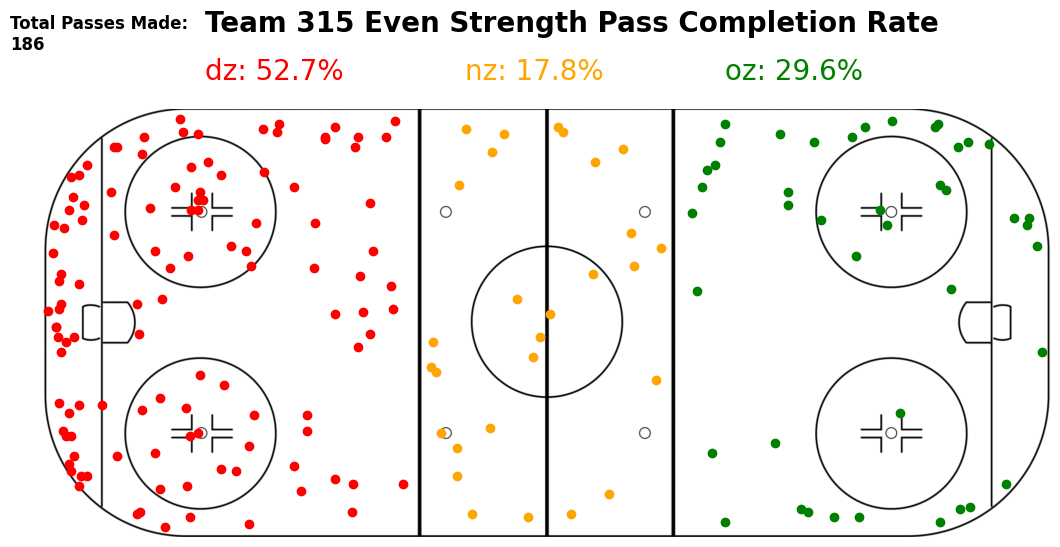

In [20]:
# Plot shot map for player
fig, ax = plt.subplots(figsize = (13,6)) 
ax.imshow(rinkImage, # Use 'desired image as background
          extent=[-100, 100, -42.5, 42.5] # Set desired axis to fit plot
          )

for x in range(len(winTeamEvenPass['xadjcoord'])):
    if winTeamEvenPass['zone'][x] == 'dz':
        ax.scatter(winTeamEvenPass['xadjcoord'][x], winTeamEvenPass['yadjcoord'][x], color = 'red')
    if winTeamEvenPass['zone'][x] == 'nz':
        ax.scatter(winTeamEvenPass['xadjcoord'][x], winTeamEvenPass['yadjcoord'][x], color = 'orange')
    if winTeamEvenPass['zone'][x] == 'oz':
        ax.scatter(winTeamEvenPass['xadjcoord'][x], winTeamEvenPass['yadjcoord'][x], color = 'green')

# Add text layers witht he completion rate
for index, row in lossPassComp.iterrows():
    zone = row['zone']
    completionrate = row['completionrate(%)']
    
    if zone == 'dz':
        fig.text(x=0.25, y=0.9, s=f'{zone}: {completionrate}%', size=20, color = 'red')
    elif zone == 'nz':
        fig.text(x=0.45, y=0.9, s=f'{zone}: {completionrate}%', size=20,  color = 'orange')
    elif zone == 'oz':
        fig.text(x=0.65, y=0.9, s=f'{zone}: {completionrate}%', size=20,  color = 'green')

fig.text(x = 0.25, y =.98, s = f'Team {winTeamID} Even Strength Pass Completion Rate', 
         weight = 'bold', size = 20)

# Add total passes made
fig.text(x = 0.1, y = .95 , s = f'Total Passes Made:\n{winPassComp['count'].sum()}',
        weight = 'semibold', size = 12)

plt.axis('off')
plt.show()

### b. Which zone was more difficult to complete passes in at even strength, why do you think that is? 

In [21]:
# which zone had the most incomplete passes at even strngth
incompleteEvenStrength = gameData[(gameData['passoutcome'] == 'successful') # Get the failed passes
                                & (gameData['manpowersituation'] == 'evenStrength') # When the power situation was at evenstrength
                                ]
print(f'The defensive zone (dz) is where most failed passes at {round(incompleteEvenStrength.value_counts('zone')['dz']/incompleteEvenStrength.shape[0] * 100,2)} %, which tells us it was the most difficult zone to complete passes in at even strength.')

The defensive zone (dz) is where most failed passes at 57.46 %, which tells us it was the most difficult zone to complete passes in at even strength.


In [22]:
gameData.head()

,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid,opposingteamgoalieoniceid,xadjcoord,yadjcoord,passoutcome,shotoutcome,receptionoutcome,gamePeriod,shotdistance
0,pass,successful,south,0.733333,southCenterNZ,nz,evenStrength,0,311,111452,80264,-2.316772,9.808823,successful,None,None,firstPeriod,NaN
1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0,311,80,80264,-26.457947,6.791176,None,None,successful,firstPeriod,NaN
2,pass,successful,stretchoffboards,2.566667,westPointDZ,dz,evenStrength,0,311,80,80264,-30.481476,30.932352,successful,None,None,firstPeriod,NaN
3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0,311,111452,80264,3.718521,35.458824,None,None,successful,firstPeriod,NaN
4,pass,successful,outlet,5.433333,innerSlotDZ,dz,evenStrength,0,315,80264,5152,-81.171463,3.770588,successful,None,None,firstPeriod,NaN


### c. What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

In [23]:
saveData = gameData[['opposingteamgoalieoniceid','eventname','outcome','shotoutcome','goal','playsection']]

# Get the goalieids and assign a variable
goalie1 = saveData['opposingteamgoalieoniceid'].unique()[0]
goalie2 = saveData['opposingteamgoalieoniceid'].unique()[1]

# Our desired slots
desiredSlots = ['innerSlot','westOuterSlot','eastOuterSlot']

# Filter our data

# total shots = where eventname = shot or shotstatus is not null
totalShots = saveData[saveData['shotoutcome'].notnull()] # or saveData[saveData['eventname'] == 'shot']
# filter to keep only shots that we desire
totalDesiredShots = totalShots[totalShots['playsection'].isin(desiredSlots)] 

# saves = shotonnet that is not a goal
totalSaves = saveData[(saveData['shotoutcome'] == 'successful') # Shot on net
                       & (saveData['goal'] == 0) # Not a goal
                       ].reset_index(drop=True)
# filter to keep only saves that we desire
totalDesiredSaves = totalSaves[totalSaves['playsection'].isin(desiredSlots)] 

# We defined a function that takes the goalies id and prints out
# the save % in the readbale manner

def goalpercentage(goalie_id):

    # the save percentage is calcultaed by taking a count of each instance of saves and shots
    # for the goalie
    savePercentage = totalDesiredSaves.value_counts('opposingteamgoalieoniceid')[goalie_id]/totalDesiredShots.value_counts('opposingteamgoalieoniceid')[goalie_id]
    
    # Convert to percentage and round to 2 decimal places
    savePercentage = round(savePercentage * 100,2)

    # Use print as of return to show the output for both goalies
    print(f'The save percantage for {goalie_id} is {savePercentage}%')

# Apply the fucntion by inserting the desired goalie id
goalpercentage(goalie1) # id = 80264
goalpercentage(goalie2) # id = 5152

The save percantage for 80264 is 40.74%
The save percantage for 5152 is 39.29%


# 4.

### a. Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?

In [24]:
# Array to store the (x,y) cordinates for the centrre of the net
goalCoordinates = [89,0]

# Filter to Get all shots taken from the outside north west playsection
outsideNWShotData = gameData[(gameData['eventname'] == 'shot') # Filter for onyl shot events
                             & (gameData['playsection'] == 'outsideNorthWest') #  Filter for our desired section
].reset_index(drop=True) # reset out index

# Define a function that takes the teamID and calculates the average shot distance
def avgshotdistance(team_id):

    # Filter dataframe for the given team
    df = outsideNWShotData[outsideNWShotData['teamid'] == team_id]

    # Array to store the shot distance
    shotDistance = []

    # Loop to get the (x,y) coordinates
    for index, row in df.iterrows():
        # Store the x, y values 
        x = row['xadjcoord']
        y = row['yadjcoord']

        # Join aech into a single array
        position = [x,y]

        # Calcuate the distance from the goal line 
        distance = math.dist(goalCoordinates, position)

        # Append and store in the 'shotDistance' array
        shotDistance.append(distance)

    # From the shotdistance of all required shots, we can calculate the avg distanct
    avg_shot_distance = sum(shotDistance)/len(shotDistance)

    print(f'The average shot distance for team {team_id} is {round(avg_shot_distance,2)} feets.')

# Run the function given the team ids.
avgshotdistance(lossTeamID) # Loss Team - 311
avgshotdistance(winTeamID) # Win Team - 315

The average shot distance for team 311 is 32.74 feets.
The average shot distance for team 315 is 35.57 feets.


### b. What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

In [25]:
# Get total shots faced - shotonnet
xSaveData = mergedDF[['opposingteamgoalieoniceid','eventname','outcome','shotoutcome',
          'playsection','goal','xg','xadjcoord','yadjcoord']]

# Filter for when shots on net and shots taken from outsideNorthWest section
xSaveDataNW = xSaveData[(xSaveData['playsection'] == 'outsideNorthWest') # Shots fomr outsideNorthWest
                        & (xSaveData['shotoutcome'] == 'successful')].reset_index(drop=True)

def xgsave(goalie_id):

    # Take the goalie_id and find the Saved Above Expected
    # Saved Above Expected = Total Goals - Total xG from shots faced 
    saveAbovexG =  xSaveDataNW.groupby('opposingteamgoalieoniceid')['goal'].sum()[goalie_id] - xSaveDataNW.groupby('opposingteamgoalieoniceid')['xg'].sum()[goalie_id]

    # Use print as of return to show the output for both goalies rounded to 5dp
    print(f'The Saved Above Expected for {goalie_id} is {round(saveAbovexG,5)}')

# Apply the fucntion by inserting the desired goalie id
xgsave(goalie1) # id = 80264
xgsave(goalie2) # id = 5152

The Saved Above Expected for 80264 is 0.67003
The Saved Above Expected for 5152 is 1.52553


# 5.

### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 7380 have that were assisted?

In [26]:
shotAssistsA = teamA[(teamA['eventname'] == 'shot') & (teamA['shotassist'] == 'shotassist')]
shotAssistsB = teamB[(teamB['eventname'] == 'shot') & (teamB['shotassist'] == 'shotassist')]

fullShotAssist = pd.concat([shotAssistsA, shotAssistsB], axis = 0)

print(f'Player 79380 has {fullShotAssist[fullShotAssist['playerid'] == 79380].shape[0]} assisted shots.')


Player 79380 has 5 assisted shots.


### b. For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?

In [202]:
# Join team A and B tables using concat
fullTeamAssist = pd.concat([teamA, teamB], axis = 0).sort_values('compiledgametime', ascending=True).reset_index(drop='True')

# Assign passer column for assisted shots
fullTeamAssist['passer'] = None

# Iterate over the events
for i in range(len(fullTeamAssist) - 1):
    if (fullTeamAssist.loc[i, 'receptionoutcome'] == 'successful'):
        #teamData.loc[i + 1, 'playerid'] == teamData.loc[i + 2, 'playerid']):
        
        # Mark the shot as having a Shot Assist
        fullTeamAssist.at[i, 'passer'] = fullTeamAssist.loc[i-1, 'playerid']

passreception = fullTeamAssist[(fullTeamAssist['shotassist'] == 'shotassist') | (fullTeamAssist['passer']=='passer')]
# Merge with xG
passerxG = pd.merge(passreception, xGData, on = 'compiledgametime', how = 'inner')
passerxG.head()

,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid_x,...,shotoutcome,receptionoutcome,gamePeriod,shotdistance,shotassist,end_xcoord,end_ycoord,passer,playerid_y,xg
0,shot,successful,outside,38.633335,outsideNorthWest,oz,evenStrength,1,311,109964,...,successful,None,firstPeriod,81.257955,shotassist,89.0,0.0,None,109964,0.072824
1,shot,successful,outside,111.133330,centerPoint,oz,evenStrength,0,311,1462,...,successful,None,firstPeriod,41.231930,shotassist,89.0,0.0,None,1462,0.007172
2,shot,successful,outside,131.700000,northCenterNZ,oz,evenStrength,0,311,109964,...,successful,None,firstPeriod,24.577569,shotassist,89.0,0.0,None,109964,0.002619
3,shot,successful,slot,236.933330,westOuterSlot,oz,powerPlay,0,315,81408,...,successful,None,firstPeriod,64.321793,shotassist,89.0,0.0,None,81408,0.072075
4,shot,successful,outside,741.033300,centerPoint,oz,evenStrength,0,311,112050,...,successful,None,firstPeriod,37.711413,shotassist,89.0,0.0,None,112050,0.006137


In [203]:
# Group teh xG by passer
topPassxG = passerxG.groupby('playerid_x')['xg'].sum().sort_values(ascending=False).rename_axis('playerid').reset_index(name='totalxg')
print(f'Passer {topPassxG['playerid'][0]} created the most xG for their teammate with {topPassxG['totalxg'][0]}.')
topPassxG.head()

Passer 81408 created the most xG for their teammate with 0.738209169358015.


,playerid,totalxg
0,81408,0.738209
1,370192,0.364978
2,112050,0.233304
3,110409,0.215713
4,79380,0.159075


### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

In [171]:
df_a = fullTeamAssist[(fullTeamAssist['passoutcome'] == 'successful') & (fullTeamAssist['playerid'] == 81408)]
df_b = passreception[passreception['shotassist'] == 'shotassist']

df_j = pd.concat([df_a,df_b], axis = 0).sort_values('compiledgametime', ascending=True).reset_index(drop=True)
#df_j.sort_values(ascending=False)

In [172]:
# whrere player passes the ball () # pass success for playerid 81308
# where the receiver shot the ball () therefore takes a succesfful shots recevied by playerid

# get succesfful shots/shot assist where the pass was from player id 81408
for i in range(1, len(df_j)):
    if (df_j.loc[i, 'eventname'] == 'shot') and (df_j.loc[i-1, 'eventname'] == 'pass'): #and (df_j.loc[i-1, 'playerid' == 81408]) and (df_j.loc[i - 1, 'outcome'] == 'successful'):
        # set passer to assisted
        df_j.at[i, 'passer'] = '81408'

a = df_j[(df_j['end_xcoord'].notnull()) | (df_j['passer'] == '81408')]
a.columns

Index(['event_id', 'eventname', 'outcome', 'type', 'compiledgametime',
       'playsection', 'zone', 'manpowersituation', 'goal', 'teamid',
       'playerid', 'opposingteamgoalieoniceid', 'xadjcoord', 'yadjcoord',
       'passoutcome', 'shotoutcome', 'receptionoutcome', 'gamePeriod',
       'shotdistance', 'shotassist', 'end_xcoord', 'end_ycoord', 'passer'],
      dtype='object')

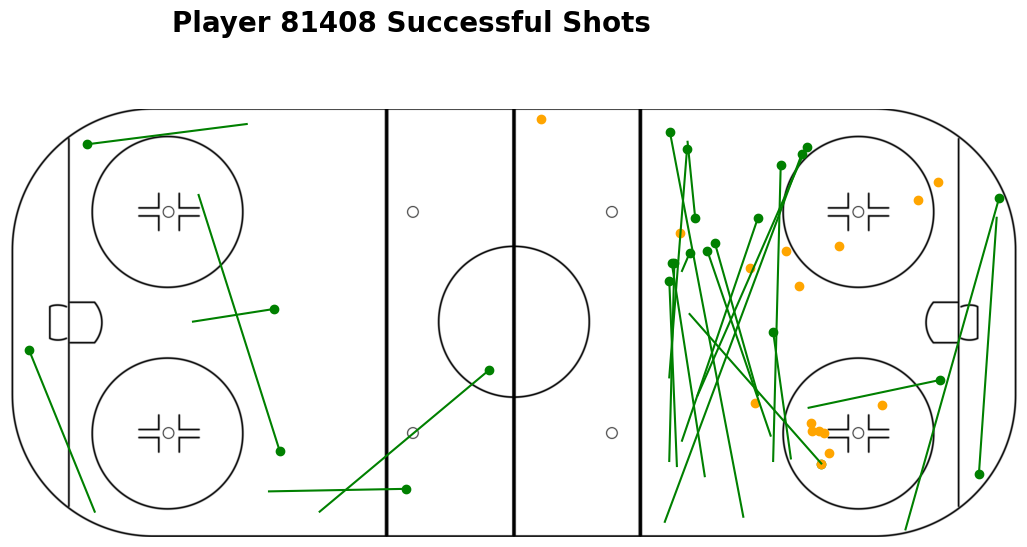

In [173]:
# Plot shot map for player
fig, ax = plt.subplots(figsize = (13,6)) 
ax.imshow(rinkImage, # Use 'desired image as background
          extent=[-100, 100, -42.5, 42.5] # Set desired axis to fit plot
          )

# Iterate over the DataFrame rows to plot passes and shots
for idx, row in a.iterrows():
    if row['passoutcome'] == 'successful':
        # Plot successful passes with green lines and scatter points
        ax.plot([row['xadjcoord'], row['end_xcoord']], [row['yadjcoord'], row['end_ycoord']], color='green')
        ax.scatter(row['end_xcoord'], row['end_ycoord'], color='green') # dot pass end location
    if row['passer'] == '81408':
        # Plot shots (where passoutcome is None) with orange scatter points
        ax.scatter(row['xadjcoord'], row['yadjcoord'], color='orange')


fig.text(x = 0.25, y =.98, s = f'Player 81408 Successful Shots', 
         weight = 'bold', size = 20)

plt.axis('off')
plt.show()

# 6

### a) Which team won the xG battle and how much xG did each teamid have?

In [174]:
# We group our data by teamid and sum the xG
xGBattle = mergedDF.groupby('teamid')['xg'].sum()
print(f'TeamID {lossTeamID} accumulated the highest xG: {xGBattle[lossTeamID]}')
print('')
print("Below is each team's xG:")
print(xGBattle.reset_index())

TeamID 311 accumulated the highest xG: 5.153972277792919

Below is each team's xG:
   teamid        xg
0     311  5.153972
1     315  4.099661


In [204]:
# Merge with xG
fullxG = pd.merge(fullTeamAssist, xGData, on = 'compiledgametime', how = 'inner')
fullxG.head()

,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid_x,...,shotoutcome,receptionoutcome,gamePeriod,shotdistance,shotassist,end_xcoord,end_ycoord,passer,playerid_y,xg
0,shot,failed,outsideblocked,30.733334,westPoint,oz,evenStrength,0,311,94531,...,unsuccessful,None,firstPeriod,48.159262,None,NaN,NaN,None,94531,0.002939
1,shot,successful,outside,38.633335,outsideNorthWest,oz,evenStrength,1,311,109964,...,successful,None,firstPeriod,81.257955,shotassist,89.000000,0.000000,None,109964,0.072824
2,shot,failed,outside,79.433334,outsideNorthEast,oz,evenStrength,0,315,884,...,unsuccessful,None,firstPeriod,84.303251,None,NaN,NaN,None,884,0.037817
3,pass,failed,north,82.200000,westPoint,oz,evenStrength,0,315,56711,...,None,None,firstPeriod,NaN,None,93.852066,-28.920588,None,56711,0.252678
4,pass,successful,outlet,90.900000,outsideNorthWestDZ,dz,evenStrength,0,311,108339,...,None,None,firstPeriod,NaN,None,-62.174637,29.423531,None,108339,0.392448


In [ ]:
# Export
#Full data
fullxG.reset_index(names='id').to_csv(r'./fullxGGameData.csv')

In [178]:
fullTeamAssist.reset_index(names='id').to_csv(r'./fullGameData.csv')

In [206]:
fullTeamAssist.head()

,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid,...,yadjcoord,passoutcome,shotoutcome,receptionoutcome,gamePeriod,shotdistance,shotassist,end_xcoord,end_ycoord,passer
0,pass,successful,south,0.733333,southCenterNZ,nz,evenStrength,0,311,111452,...,9.808823,successful,None,None,firstPeriod,NaN,None,-26.457947,6.791176,None
1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0,311,80,...,6.791176,None,None,successful,firstPeriod,NaN,None,NaN,NaN,111452
2,pass,successful,stretchoffboards,2.566667,westPointDZ,dz,evenStrength,0,311,80,...,30.932352,successful,None,None,firstPeriod,NaN,None,3.718521,35.458824,None
3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0,311,111452,...,35.458824,None,None,successful,firstPeriod,NaN,None,NaN,NaN,80
4,pass,successful,outlet,5.433333,innerSlotDZ,dz,evenStrength,0,315,80264,...,3.770588,successful,None,None,firstPeriod,NaN,None,-67.089111,39.982353,None


## Pass Map

Team A = 311

In [180]:
teamAPass = fullTeamAssist[fullTeamAssist['teamid'] == 311]

In [207]:
avg_locations = fullTeamAssist.groupby(['playerid']).agg({'xadjcoord': ['mean'], 'yadjcoord': ['mean','count']})
avg_locations.columns = ['x','y','count']
avg_locations.head()

,x,y,count
playerid,,,
80,-31.115740,15.064245,51
884,23.117020,7.816446,49
1312,-66.197180,-25.082719,8
1462,-7.160905,-6.208824,13
5152,-90.966275,0.136199,13


In [208]:
completeReception = fullTeamAssist[fullTeamAssist['receptionoutcome'] == 'successful']
completeReception.reset_index(names = 'id', inplace=True)
completeReception = completeReception.rename(columns={'playerid':'receptor'})
completeReception.head()


,id,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,...,yadjcoord,passoutcome,shotoutcome,receptionoutcome,gamePeriod,shotdistance,shotassist,end_xcoord,end_ycoord,passer
0,1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0,311,...,6.791176,None,None,successful,firstPeriod,NaN,None,NaN,NaN,111452
1,3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0,311,...,35.458824,None,None,successful,firstPeriod,NaN,None,NaN,NaN,80
2,5,reception,successful,regular,6.333334,outsideNorthWestDZ,dz,evenStrength,0,315,...,39.982353,None,None,successful,firstPeriod,NaN,None,NaN,NaN,80264
3,7,reception,successful,regular,14.333333,eastPointDZ,dz,evenStrength,0,315,...,-32.944118,None,None,successful,firstPeriod,NaN,None,NaN,NaN,10534
4,9,reception,successful,regular,16.666666,outsideNorthWestDZ,dz,evenStrength,0,315,...,23.888237,None,None,successful,firstPeriod,NaN,None,NaN,NaN,400162


In [209]:
pass_between = completeReception.groupby(['passer','receptor','teamid','gamePeriod']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis = 'columns', inplace=True)

In [210]:
pass_between = pass_between.merge(avg_locations, left_on = 'passer', right_index=True)
pass_between = pass_between.merge(avg_locations, left_on= 'receptor', right_index=True, suffixes=['','_end'])
pass_between

,passer,receptor,teamid,gamePeriod,pass_count,x,y,count,x_end,y_end,count_end
0,80,80,311,firstPeriod,1,-31.115740,15.064245,51,-31.115740,15.064245,51
25,1312,80,311,firstPeriod,1,-66.197180,-25.082719,8,-31.115740,15.064245,51
33,5152,80,311,firstPeriod,1,-90.966275,0.136199,13,-31.115740,15.064245,51
217,94531,80,311,secondPeriod,2,1.285041,-13.804807,156,-31.115740,15.064245,51
218,94531,80,311,thirdPeriod,4,1.285041,-13.804807,156,-31.115740,15.064245,51
...,...,...,...,...,...,...,...,...,...,...,...
340,202206,121680,315,secondPeriod,1,-38.794470,16.102535,29,4.078742,11.463840,17
390,400162,121680,315,secondPeriod,1,-44.050859,-19.036114,43,4.078742,11.463840,17
391,400162,121680,315,thirdPeriod,1,-44.050859,-19.036114,43,4.078742,11.463840,17
429,20775372,121680,315,firstPeriod,1,-27.187615,-9.326598,69,4.078742,11.463840,17


In [212]:
pass_between = pass_between[pass_between['pass_count'] > 1]
pass_between

,passer,receptor,teamid,gamePeriod,pass_count,x,y,count,x_end,y_end,count_end
217,94531,80,311,secondPeriod,2,1.285041,-13.804807,156,-31.115740,15.064245,51
218,94531,80,311,thirdPeriod,4,1.285041,-13.804807,156,-31.115740,15.064245,51
345,237838,80,311,firstPeriod,2,10.123583,-2.334453,56,-31.115740,15.064245,51
51,6588,1312,311,firstPeriod,2,-11.662297,8.298975,89,-66.197180,-25.082719,8
2,80,94531,311,firstPeriod,2,-31.115740,15.064245,51,1.285041,-13.804807,156
...,...,...,...,...,...,...,...,...,...,...,...
207,81408,80518,315,firstPeriod,2,35.823008,-18.074885,97,36.498380,12.461764,72
317,121680,80518,315,secondPeriod,2,4.078742,11.463840,17,36.498380,12.461764,72
109,54915,202206,315,thirdPeriod,2,1.551836,-1.737115,21,-38.794470,16.102535,29
117,56711,202206,315,firstPeriod,2,-28.663268,-13.557891,22,-38.794470,16.102535,29


In [201]:
# Export
pass_between.reset_index(names='id').to_csv(r'./PassNetwork.csv')

PermissionError: [Errno 13] Permission denied: './PassNetwork.csv'